In [101]:
import pandas as pd
import numpy as np

In [102]:
df = pd.read_csv("C:\\Users\\jbron\\Downloads\\ML\\Project\\rand_df.csv")

In [103]:
df.shape

(301056, 48)

In [104]:
df.head()

,Unnamed: 0,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
0,590383,518642783,-472128670181922995,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,...,611310.0,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,211885.940,77119.7200,executive director of psl iti
1,464616,66791572,-2025912237164248888,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108652.150,42986.0400,business development and sales manager
2,215102,387815039,-1756752323363501779,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,...,237210.0,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,84556.680,5815.8657,project coordinator
3,463719,484984771,-7716377431440668051,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,...,561311.0,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,45884.164,7257.3540,account manager
4,486002,2133756552,-3377771639329560726,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,...,923110.0,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,38944.450,0.0000,elementary school teacher


In [105]:
df.tail()

,Unnamed: 0,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
301051,287360,364163929,329469143052034433,The University of Texas at Dallas,linkedin.com/school/university-of-texas-at-dallas,the university of texas at dallas,"Richardson, Texas, US",Northern America,United States,Texas,...,611310.0,"Colleges, Universities, and Professional Schools",Education Services,Higher Education and Research,Research Universities,0DC960-E,TEXAS SYSTEM UNIVERSITY OF,53612.170,0.0000,teaching assistant
301052,239935,461596273,-1185104988335526521,ValueLabs,linkedin.com/company/valuelabs,valuelabs,"Hyderabad, Telangana, India",Southern Asia,India,Telangana,...,518210.0,"Computing Infrastructure Providers, Data Proce...",Information Technology Services,Software and Technology Services,Advanced Technology and Software Engineering S...,06BZM6-E,VALUELABS SERVICES PVT LTD,23999.254,1294.1617,software engineer
301053,533449,423277159,-1012829260828153322,Instinctive Networx (P) LTD,NaN,instinctive networx p ltd,"Kolkata, West Bengal, India",Southern Asia,India,West Bengal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9920.770,2729.0073,buisness development manager
301054,573054,397247554,-1057477355379537142,KINESSO,linkedin.com/company/kinesso,kinesso,"New York, United States",Northern America,United States,New York,...,541810.0,Advertising Agencies,Information Technology Services,Digital Analytics Software,Digital Marketing and Analytics,000N2T-E,INTERPUBLIC GROUP OF COS INC,187284.610,73133.8000,manager paid search
301055,564307,676748913,8797344840678784417,AMD,linkedin.com/company/amd,amd,"Sunnyvale, CA",Northern America,United States,California,...,334413.0,Semiconductor and Related Device Manufacturing,Electronics Manufacturing,Electronics and Components Manufacturing,Semiconductor and Electronics Manufacturing,000BK7-E,ADVANCED MICRO DEVICES INC,259610.470,40872.2850,member of technical staff


In [106]:
df.drop(df.columns[0],axis=1,inplace=True)

In [107]:
df.head()

,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,metro_area,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
0,518642783,-472128670181922995,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,paris metropolitan area,...,611310.0,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,211885.940,77119.7200,executive director of psl iti
1,66791572,-2025912237164248888,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,dubai metropolitan area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108652.150,42986.0400,business development and sales manager
2,387815039,-1756752323363501779,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,salt lake city metropolitan area,...,237210.0,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,84556.680,5815.8657,project coordinator
3,484984771,-7716377431440668051,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,ireland nonmetropolitan area,...,561311.0,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,45884.164,7257.3540,account manager
4,2133756552,-3377771639329560726,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,dallas metropolitan area,...,923110.0,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,38944.450,0.0000,elementary school teacher


In [108]:
df.describe()

,user_id,position_id,remote_suitability,weight,start_salary,end_salary,seniority,salary,position_number,rcid,ultimate_parent_rcid,naics_code,total_compensation,additional_compensation
count,3.010560e+05,3.010560e+05,301056.000000,301056.000000,3.009120e+05,3.009340e+05,301056.000000,3.009340e+05,301056.000000,2.187440e+05,2.187340e+05,217437.000000,3.009340e+05,3.009340e+05
mean,6.345460e+08,1.109496e+16,0.526630,1.299033,4.248987e+04,5.016435e+04,2.340983,5.016435e+04,3.580228,1.017895e+07,1.162406e+07,538628.614449,6.765672e+04,1.749237e+04
std,5.905222e+08,5.325364e+18,0.258070,0.341351,3.944229e+04,4.781991e+04,1.483672,4.781991e+04,3.621031,2.248308e+07,2.329047e+07,172718.187422,1.036005e+05,6.876127e+04
min,1.005021e+06,-9.223338e+18,0.000016,1.000000,4.044952e+02,4.837763e+02,1.000000,4.837763e+02,1.000000,2.500000e+01,4.300000e+01,111110.000000,5.797670e+02,0.000000e+00
25%,2.295508e+08,-4.596714e+18,0.390711,1.074322,1.702951e+04,1.977022e+04,1.000000,1.977022e+04,1.000000,6.391720e+05,6.893290e+05,455110.000000,2.244094e+04,1.484465e+03
50%,4.730563e+08,-7.823733e+14,0.500000,1.200051,3.191539e+04,3.679674e+04,2.000000,3.679674e+04,2.000000,1.300504e+06,1.398143e+06,525910.000000,4.246237e+04,4.277938e+03
75%,8.075275e+08,4.638228e+18,0.706399,1.412042,5.479794e+04,6.419389e+04,3.000000,6.419389e+04,5.000000,7.186992e+06,1.193840e+07,611310.000000,7.557081e+04,1.068194e+04
max,2.183867e+09,9.223359e+18,0.999984,9.472703,1.600000e+06,1.600000e+06,7.000000,1.600000e+06,133.000000,1.004165e+08,1.004174e+08,999999.000000,9.505619e+06,9.273360e+06


In [109]:
for i in np.arange(0,len(df.columns)):
    print("Column is of type {}.".format(df[df.columns[i]].dtype.kind.lower()))

Column is of type i.
Column is of type i.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type f.
Column is of type f.
Column is of type o.
Column is of type f.
Column is of type f.
Column is of type i.
Column is of type f.
Column is of type i.
Column is of type f.
Column is of type o.
Column is of type f.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type f.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type f.
Column is of type f.
Column is of type o.


In [110]:
REMOVE_NA = True
KNOWN_NA_VALS = ['NIL', 'NILL', 'NULL', 'NA', '#NA', '#N/A', 'N/A','#VALUE!','#REF!','#DIV/0!','#NUM!','#NAME?','#NULL!','NAN','nan','NaN']

In [111]:
############################################################################################
# Experimental code here. Trying to replace Known values which means NULL / NA to np.nan
# Ideally this should help our analysis.
############################################################################################
for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    if len(df[df[x].isin(KNOWN_NA_VALS)]) > 0: #some instances were found with Known NA substitutions
        df.loc[ df[x].isin(KNOWN_NA_VALS), x ] = np.nan
        print("Found some known NA substitutions in {}. Will replace and try to force as numeric".format(x))
    try: #now we will try to see if the column can become numeric
        df[x] = pd.to_numeric(df[x], errors='raise')
    except ValueError as e:
        continue #Column cannot be converted to numeric. Just continue
############################################################################################

############################################################################################
# Experiment 2: If all endings are % or $ or # then we will try to strip these and check if 
#     the column can be converted as a numeric value
############################################################################################
sp_endings = ['%', '$', '#', '£', 'GBP', 'gbp', 'usd', 'USD' ,'eur', 'EUR']

for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    for sp in sp_endings:
        totals = df[x].astype(str).str.endswith(sp).sum() + df[x].isna().sum()
        if totals == len(df): #Either all entries end with special char or are null
            temp = df[x].astype(str).str.replace(sp, '')
            try:
                temp_numeric = pd.to_numeric(temp, errors='raise')
                df[x] = temp_numeric #if we were able to convert to numeric then we keep this
                                    # in our dataframe. else no change
                print("Modified column {} for special endings {} and changed to numeric".format(
                        x, sp))
            except ValueError as ve:
                continue
############################################################################################
# Same code as above but for string beginnings

for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    for sp in sp_endings:
        totals = df[x].astype(str).str.startswith(sp).sum() + df[x].isna().sum()
        if totals == len(df): #Either all entries end with special char or are null
            temp = df[x].astype(str).str.replace(sp, '')
            try:
                temp_numeric = pd.to_numeric(temp, errors='raise')
                df[x] = temp_numeric #if we were able to convert to numeric then we keep this
                                    # in our dataframe. else no change
                print("Modified column {} for special startings {} and changed to numeric".format(
                        x, sp))
            except ValueError as ve:
                continue
############################################################################################
# Now we have to deal with NA values
if REMOVE_NA == True:
    df = df.dropna(axis=0, how='all')
else:
    for x in [x for x in df.columns]:
        if df[x].dtype.kind in ('f', 'c', 'i', 'u'):
            df[x].fillna(df[x].median(),inplace=True)
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
############################################################################################

    
############################################################################################    
We will delete any column if it is Completely np.nan
a = df.isna().sum(axis=0)
FULL_NA_COLS = [x for x in a[df.isna().sum(axis=0) == len(df)].index]
df = df.drop(FULL_NA_COLS, axis=1)

Found some known NA substitutions in title_raw. Will replace and try to force as numeric
Found some known NA substitutions in ticker. Will replace and try to force as numeric
Found some known NA substitutions in ultimate_parent_factset_name. Will replace and try to force as numeric


In [112]:
for i in np.arange(0,len(df.columns)):
    print("Column is of type {}.".format(df[df.columns[i]].dtype.kind.lower()))

Column is of type i.
Column is of type i.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type f.
Column is of type f.
Column is of type o.
Column is of type f.
Column is of type f.
Column is of type i.
Column is of type f.
Column is of type i.
Column is of type f.
Column is of type o.
Column is of type f.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type f.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type o.
Column is of type f.
Column is of type f.
Column is of type o.


In [125]:
df_text_component = df.select_dtypes(include=['object'])

In [124]:
df_num_component = df.select_dtypes(exclude=['object'])

In [123]:
df.shape

(301056, 47)

In [128]:
df_num_component.head()

,user_id,position_id,remote_suitability,weight,start_salary,end_salary,seniority,salary,position_number,rcid,ultimate_parent_rcid,naics_code,total_compensation,additional_compensation
0,518642783,-472128670181922995,0.992714,1.002545,112215.189589,134766.221050,5,134766.22,2,455485.0,455485.0,611310.0,211885.940,77119.7200
1,66791572,-2025912237164248888,0.500000,1.115904,62533.291917,65666.107076,4,65666.11,1,NaN,NaN,NaN,108652.150,42986.0400
2,387815039,-1756752323363501779,0.504244,1.039225,55533.319746,78740.812085,1,78740.81,3,215420.0,215420.0,237210.0,84556.680,5815.8657
3,484984771,-7716377431440668051,0.920417,1.075445,37448.902476,38626.810545,3,38626.81,5,1462736.0,730545.0,561311.0,45884.164,7257.3540
4,2133756552,-3377771639329560726,0.137859,1.488304,35190.837399,38944.449793,1,38944.45,2,3654140.0,3654140.0,923110.0,38944.450,0.0000


In [127]:
df_text_component.head()

,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,metro_area,startdate,enddate,...,ticker,exchange,cusip,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,title_translated
0,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,paris metropolitan area,2014-02-01,2015-06-01,...,NaN,NaN,NaN,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,executive director of psl iti
1,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,dubai metropolitan area,2009-05-01,2011-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,business development and sales manager
2,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,salt lake city metropolitan area,2015-06-01,NaN,...,NaN,NaN,NaN,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,project coordinator
3,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,ireland nonmetropolitan area,2001-02-01,2002-04-01,...,NaN,NaN,NaN,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,account manager
4,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,dallas metropolitan area,2001-08-01,2005-06-01,...,NaN,NaN,NaN,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,elementary school teacher


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'position_id'}>,
        <Axes: title={'center': 'remote_suitability'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'start_salary'}>,
        <Axes: title={'center': 'end_salary'}>,
        <Axes: title={'center': 'seniority'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'position_number'}>,
        <Axes: title={'center': 'rcid'}>,
        <Axes: title={'center': 'ultimate_parent_rcid'}>,
        <Axes: title={'center': 'naics_code'}>],
       [<Axes: title={'center': 'total_compensation'}>,
        <Axes: title={'center': 'additional_compensation'}>, <Axes: >,
        <Axes: >]], dtype=object)

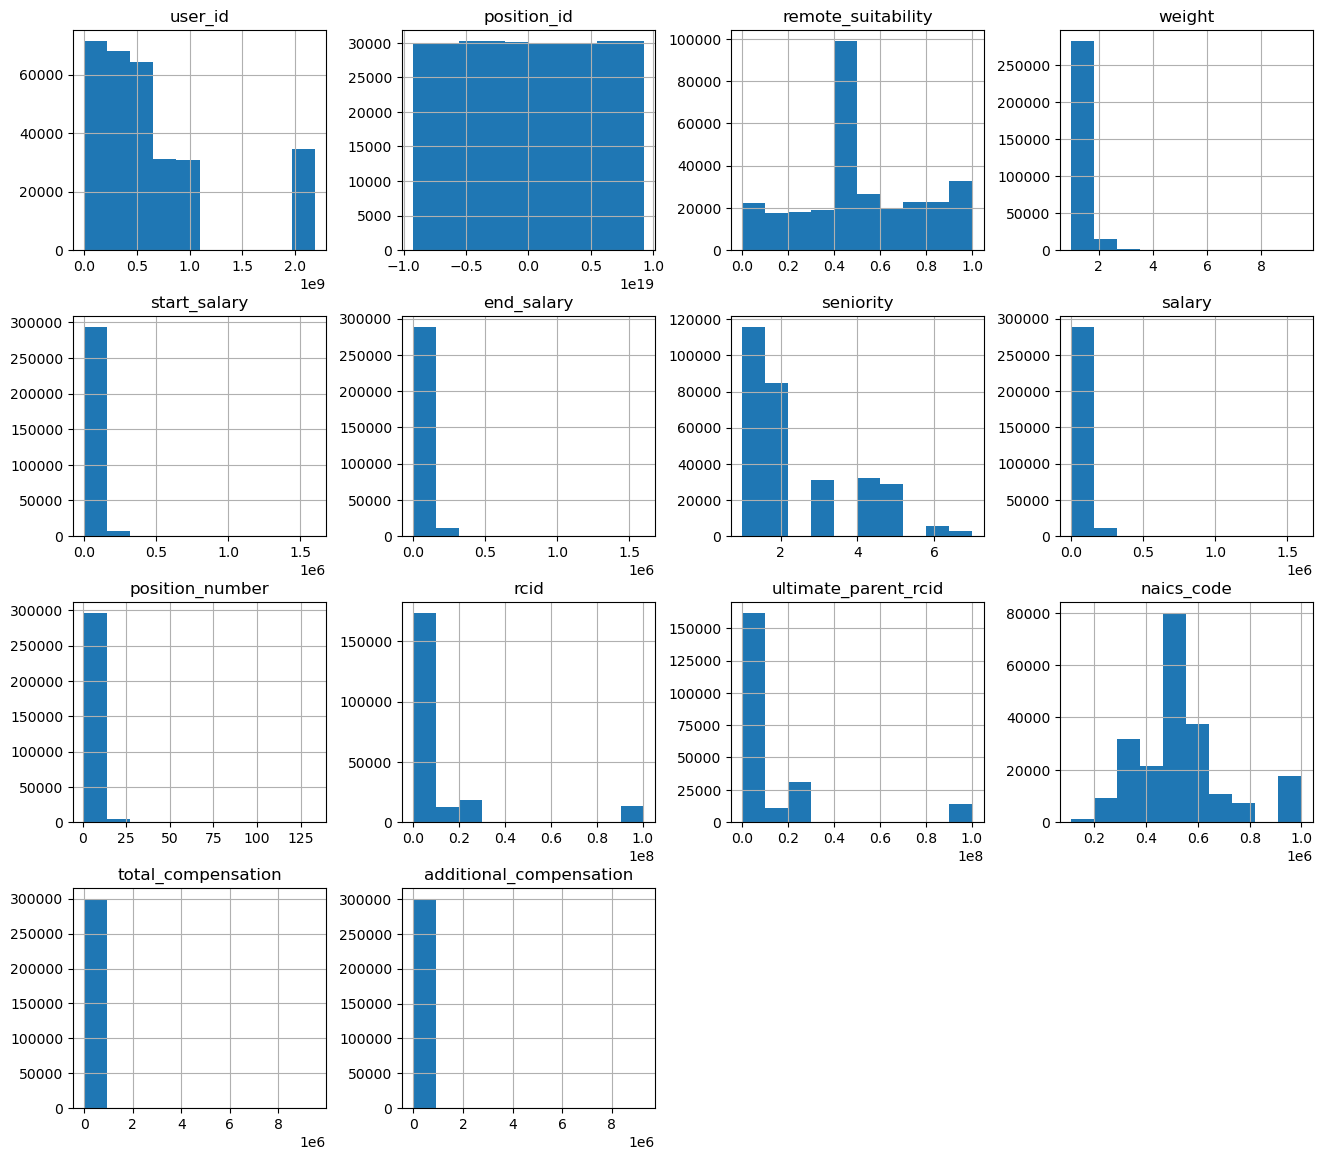

In [132]:
df_num_component.hist(figsize=(16,14))